In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
high_antigen_count = [
    'A0201_ELAGIGILTV_MART-1_Cancer_binder',
    'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
    'A0201_GLCTLVAML_BMLF1_EBV_binder',
    'A0301_KLGGALQAK_IE-1_CMV_binder',
    'A0301_RLRAEAQVK_EMNA-3A_EBV_binder',
    'A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
    'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder',
    'B0801_RAKFKQLL_BZLF1_EBV_binder'
 ]

In [6]:
high_clonotype_count = [
    18840,
    41053,
    2210,
    28859,
    10,
    18829,
    41071,
    164,
]

In [98]:
def plot_characteristic_genes(group_name):
    path_data = '../data/10x_CD8TC/v5_train_val_test.h5ad'
    adata = sc.read_h5ad(path_data)
    
    adata.obs['binding_name'][~adata.obs['binding_name'].isin(high_antigen_count)] = 'no_data'
    adata.obs['binding_name'].cat.remove_unused_categories(inplace=True)
    
    adata.obs['clonotype'][~adata.obs['clonotype'].isin(high_clonotype_count)] = 'other types'
    
    sc.tl.rank_genes_groups(adata, groupby=group_name)
    
    rcParams['figure.figsize']=(10,5)
    sc.pl.rank_genes_groups(adata, n_genes=30, fontsize=18, ncols=3)
    print(adata.obs['clonotype'].value_counts())

C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


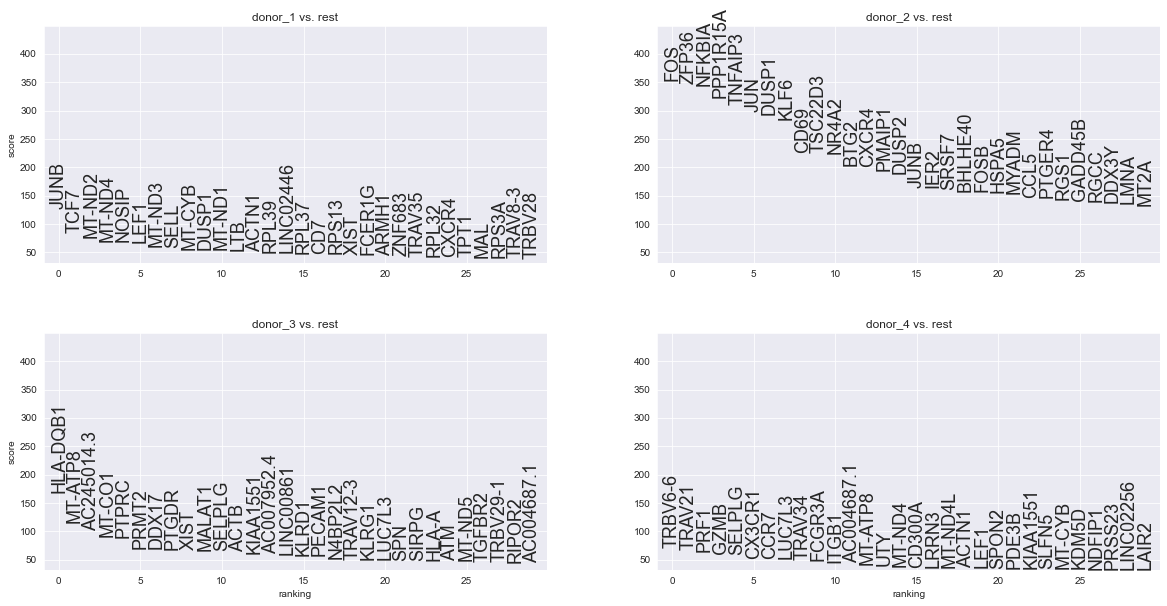

no_data                                    69215
A0301_KLGGALQAK_IE-1_CMV_binder            26347
B0801_RAKFKQLL_BZLF1_EBV_binder            16478
A0201_GILGFVFTL_Flu-MP_Influenza_binder     7380
A1101_IVTDFSVIK_EBNA-3B_EBV_binder          5657
A1101_AVFDRKSDAK_EBNA-3B_EBV_binder         3510
Name: binding_name, dtype: int64


In [76]:
plot_characteristic_genes('donor')

C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


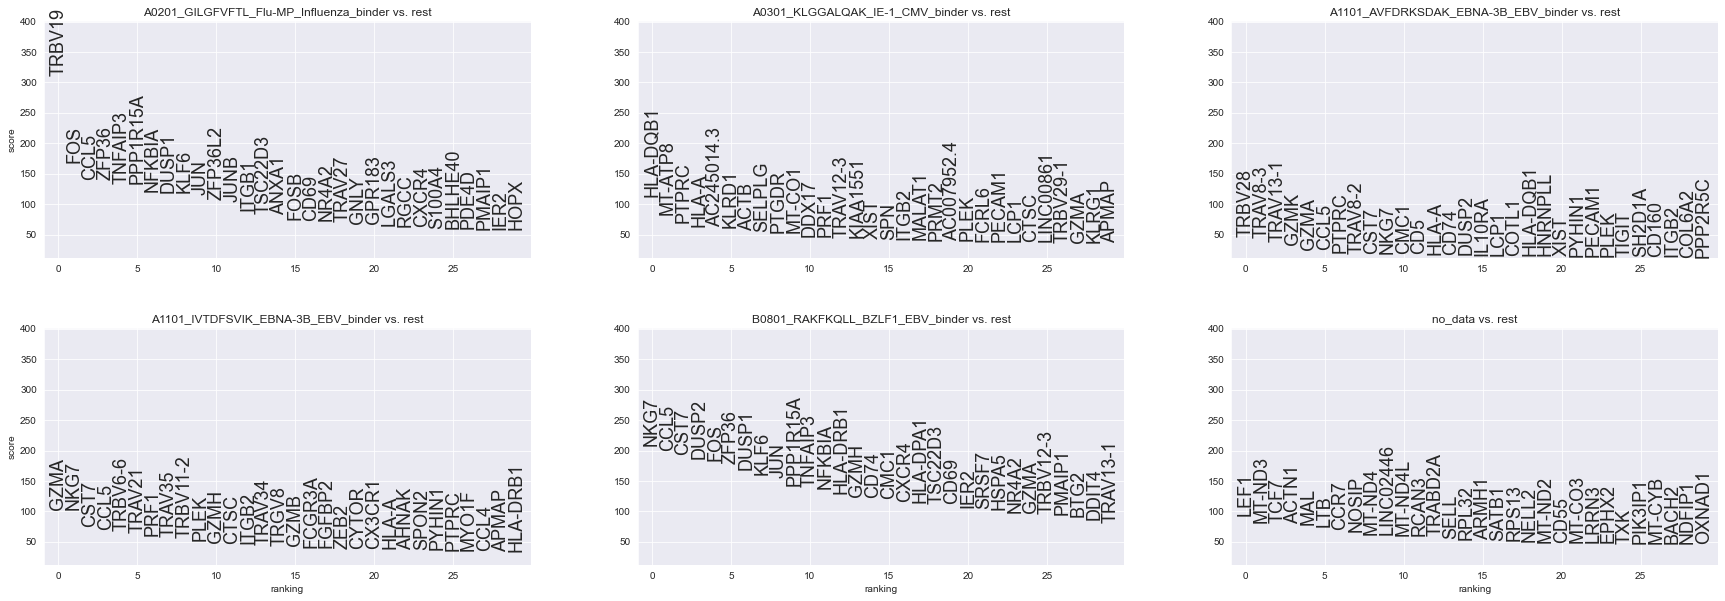

no_data                                    69215
A0301_KLGGALQAK_IE-1_CMV_binder            26347
B0801_RAKFKQLL_BZLF1_EBV_binder            16478
A0201_GILGFVFTL_Flu-MP_Influenza_binder     7380
A1101_IVTDFSVIK_EBNA-3B_EBV_binder          5657
A1101_AVFDRKSDAK_EBNA-3B_EBV_binder         3510
Name: binding_name, dtype: int64


In [78]:
plot_characteristic_genes('binding_name')

C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
... storing 'clonotype' as categorical


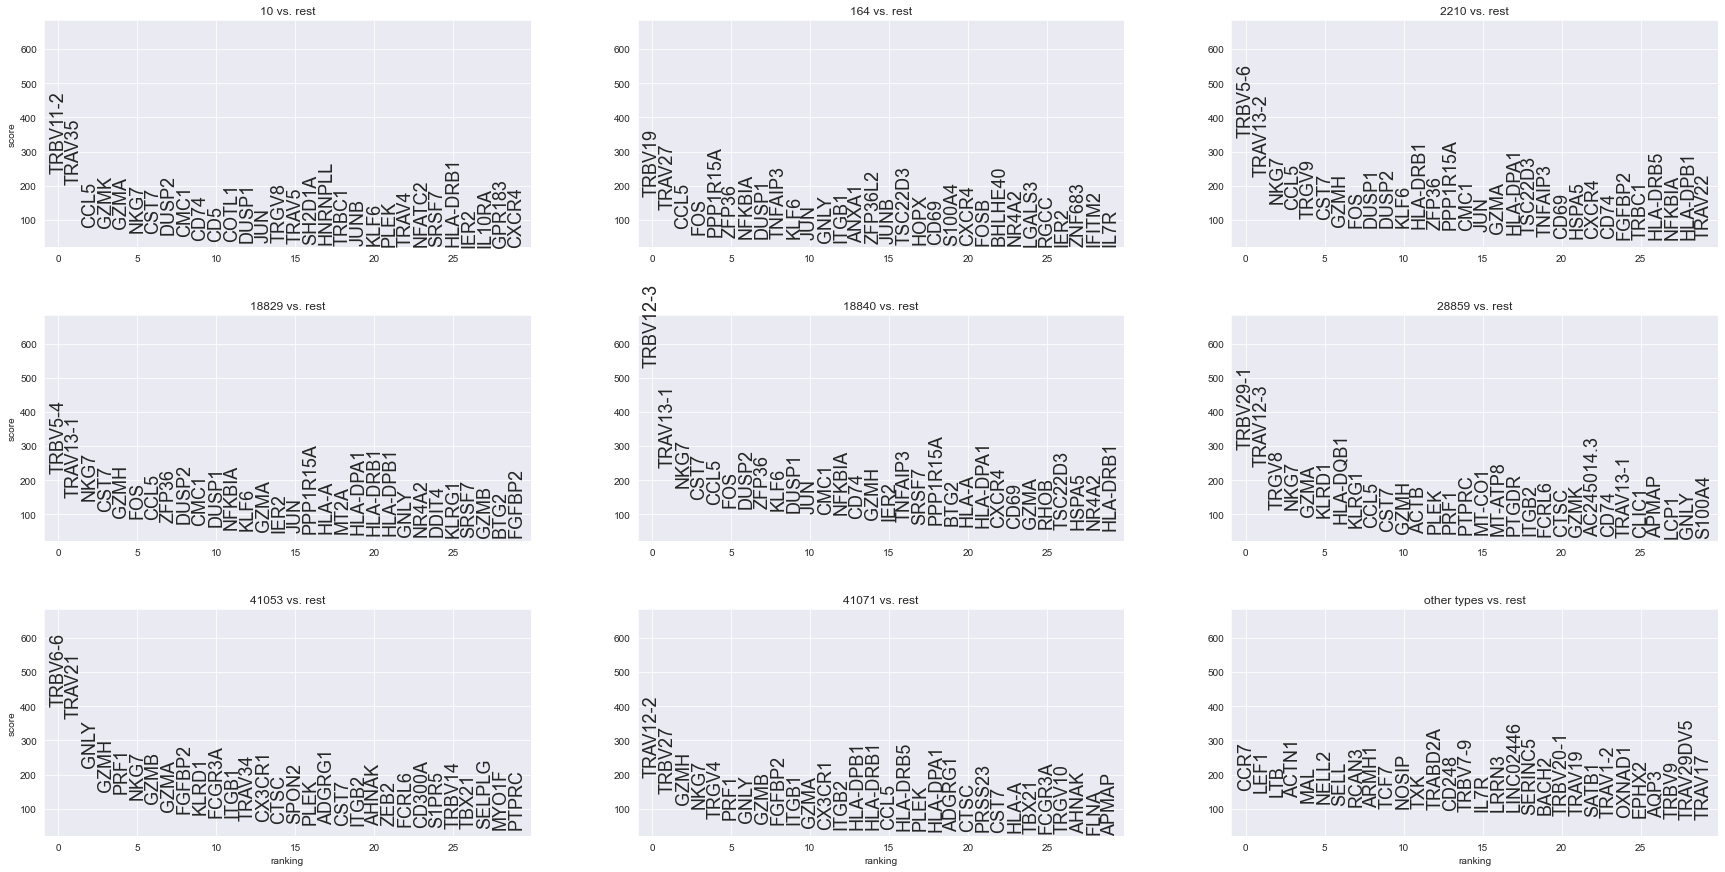

other types    106068
18840            5333
41053            3837
2210             3826
28859            2977
10               2210
18829            2126
41071            1131
164              1079
Name: clonotype, dtype: int64


In [99]:
plot_characteristic_genes('clonotype')

# Clonotype Check

Check whether each clonotype has unique specificity

In [2]:
adata = sc.read_h5ad('../data/10x_CD8TC/v5_train_val_test.h5ad')

In [7]:
adata.obs['binding_name'][~adata.obs['binding_name'].isin(high_antigen_count)] = 'no_data'
adata.obs['binding_name'].cat.remove_unused_categories(inplace=True)

C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


[Text(0, 0, 'A0201_ELAGIGILTV_MART-1_Cancer'),
 Text(1, 0, 'A0201_GILGFVFTL_Flu-MP_Influenza'),
 Text(2, 0, 'A0201_GLCTLVAML_BMLF1_EBV'),
 Text(3, 0, 'A0301_KLGGALQAK_IE-1_CMV'),
 Text(4, 0, 'A0301_RLRAEAQVK_EMNA-3A_EBV'),
 Text(5, 0, 'A1101_AVFDRKSDAK_EBNA-3B_EBV'),
 Text(6, 0, 'A1101_IVTDFSVIK_EBNA-3B_EBV'),
 Text(7, 0, 'B0801_RAKFKQLL_BZLF1_EBV'),
 Text(8, 0, 'no_data')]

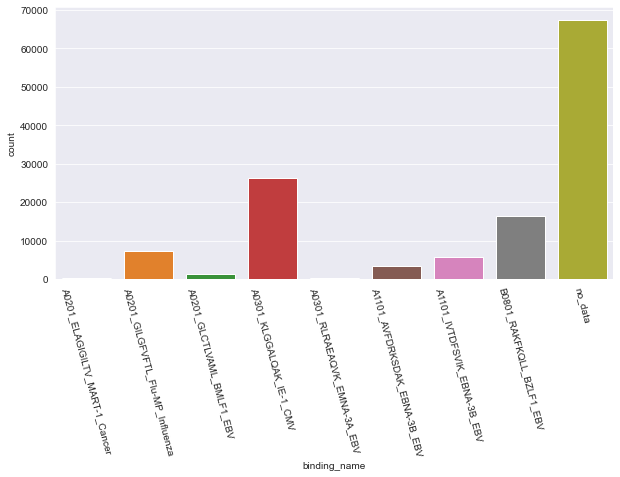

In [8]:
rcParams['figure.figsize'] = (10, 5)
graph = sns.countplot(x='binding_name', data=adata.obs)
labels = [x.get_text().replace('_binder', '') for x in graph.get_xticklabels()]
graph.set_xticklabels(labels, rotation=-75)

In [9]:
uniques = adata.obs.groupby('clonotype')['donor'].nunique()

In [10]:
uniques.sort_values(ascending=False)
uniques.value_counts()

1    51137
2       76
Name: donor, dtype: int64

While the majority (49172) of clonotypes have only one specificity, ~2000 bind to multiple epitopes.